<a href="https://colab.research.google.com/github/charlee/practicalML/blob/master/03_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topics in Statistics


## Sampling Distribution of the mean

The mean of the sampling (say, sampling 10 from the population) will not equal to the population mean.
Repeat this process (take 10 samples and compute the mean), and construct a **frequency distribution** of those means.

Given a population with a mean of $\mu$ and a standard deviation of $\sigma$, the sampling distribution of the mean has:

- $\mu_M = \mu$
- $\sigma_M = \frac{\sigma}{\sqrt{n}}$

where $n$ is the sample size. $\sigma_M$ is called the *standard error of the mean*.



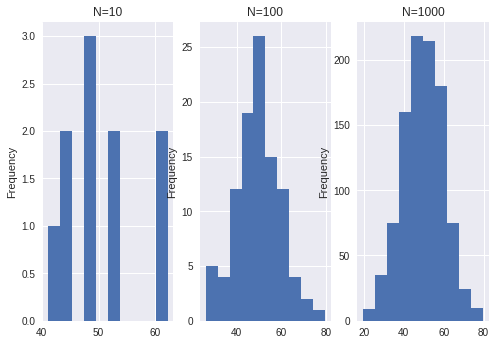

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Generate population
population_size = 1000
population = np.random.randint(100, size=population_size)

# Sampling size
n = 8

means = []
for N in range(1000):
  # Sampling
  samples = np.random.choice(population, size=n, replace=False)
  means.append(np.mean(samples))
  
plt.subplot(1,3,1)
plt.hist(means[:10], bins=10)
plt.ylabel('Frequency')
plt.title('N=10')

plt.subplot(1,3,2)
plt.hist(means[:100], bins=10)
plt.ylabel('Frequency')
plt.title('N=100')

plt.subplot(1,3,3)
plt.hist(means[:1000], bins=10)
plt.ylabel('Frequency')
plt.title('N=1000')


plt.show()


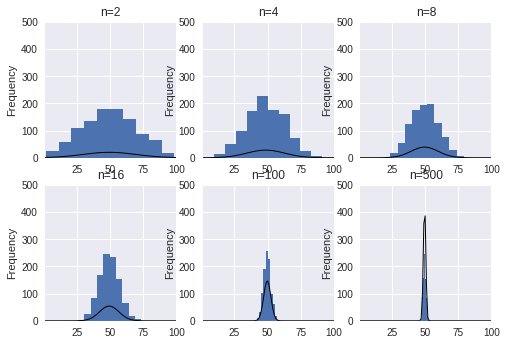

In [0]:
from scipy.stats import norm

sizes = (2, 4, 8, 16, 100, 500)
xmin, xmax = (1, 100)
x = np.linspace(xmin, xmax, 100)
  

for i, n in enumerate(sizes):
  # Sampling
  means = []
  for N in range(1000):
    samples = np.random.choice(population, size=n, replace=False)
    means.append(np.mean(samples))

  mu, std = norm.fit(means)

  plt.subplot(2, math.ceil(len(sizes) / 2), i+1)
  
  plt.ylim(0, 500)
  plt.xlim(1, 100)
  plt.hist(means, bins=10)
  p = norm.pdf(x, mu, std) * 1000      # TODO: how to plot on graph? * 1000?

  plt.plot(x, p, 'k', linewidth=1)
  plt.ylabel('Frequency')
  plt.title('n=%s' % (n))

plt.show()


## Student's t-Test


Try to use [Mall Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) from Kaggle to show the t-Test.

In [40]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/charlee/practicalML/master/datasets/Mall_Customers.csv')
df.columns = ['id', 'gender', 'age', 'income', 'score']
df = df.dropna()
df.head()

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
df.describe()

,id,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Now we compare the spending score of two groups: "Male" and "Female".

First we determine a null hypothesis and an alternative hypothesis:
- $H_0$: spending score of men and women are the same
- $H_a$: spending score of men and women are different

Next determine a confidence interval $\alpha = 0.05$.

In [38]:
# Collect data
male = df[df.gender=='Male'].score
male.describe()

count    88.000000
mean     48.511364
std      27.896770
min       1.000000
25%      24.500000
50%      50.000000
75%      70.000000
max      97.000000
Name: score, dtype: float64

In [39]:
female = df[df.gender=='Female'].score
female.describe()

count    112.000000
mean      51.526786
std       24.114950
min        5.000000
25%       35.000000
50%       50.000000
75%       73.000000
max       99.000000
Name: score, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5, 1.0, 'Spending score')

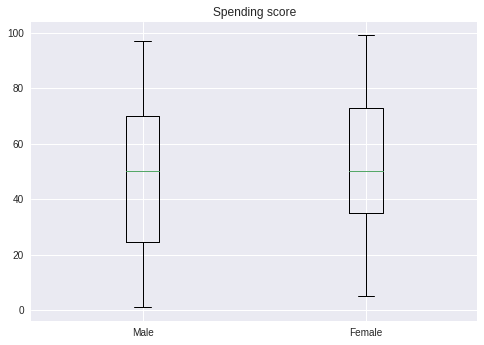

In [43]:
plt.boxplot([male, female], labels=['Male', 'Female'])
plt.title('Spending score')

We can see that sample sizes of male and female are different. Use `scipy.stats.ttest_ind(equal_var=False)` to perform a two-sided t-test.

In [37]:
t, p = stats.ttest_ind(male.score, female.score, equal_var=False)
print(t, p)

-0.8048781809684525 0.42199772447783646


$p = 0.42 > \alpha = 0.05$, we failed to reject $H_0$, thus there is no evidence that the spending score of men and women are different.

# UNUSED

In [27]:
from scipy import stats
import pandas as pd

df = pd.read_csv('https://github.com/charlee/practicalML/raw/master/datasets/suicide-rates-overview-1985-to-2016.csv')
df = df.dropna()

# Only use US data for this test
df = df[df.country == 'United States'].reset_index().drop(['index', 'country', 'country-year', 'generation'], axis=1)
df.head()

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,1985,male,75+ years,2177,4064000,53.57,0.841,"4,346,734,000,000",19693
1,1985,male,55-74 years,5302,17971000,29.50,0.841,"4,346,734,000,000",19693
2,1985,male,25-34 years,5134,20986000,24.46,0.841,"4,346,734,000,000",19693
3,1985,male,35-54 years,6053,26589000,22.77,0.841,"4,346,734,000,000",19693
4,1985,male,15-24 years,4267,19962000,21.38,0.841,"4,346,734,000,000",19693


In [23]:
# Group data by sex

,index,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000
mean,27075.500000,2003.500000,2966.358333,2.246871e+07,13.860500,0.891600,43951.800000
std,119.494383,9.953674,2967.916129,9.759830e+06,12.935104,0.024741,13287.568572
min,26848.000000,1985.000000,63.000000,4.064000e+06,0.310000,0.841000,19693.000000
25%,26973.750000,1995.000000,556.500000,1.855105e+07,3.997500,0.876000,31518.000000
50%,27123.500000,2007.500000,2220.500000,2.100708e+07,7.200000,0.903000,49706.000000
75%,27177.250000,2012.000000,4137.250000,2.602668e+07,23.632500,0.912000,55170.000000
max,27207.000000,2014.000000,11767.000000,4.350934e+07,57.850000,0.915000,58531.000000


Ireland                         120
Spain                           120
Belgium                         120
Thailand                        120
Ecuador                         120
Netherlands                     120
United Kingdom                  120
Costa Rica                      120
Bulgaria                        120
Malta                           120
United States                   120
Colombia                        120
Israel                          120
Italy                           120
Argentina                       120
Greece                          120
France                          120
Mauritius                       120
Brazil                          120
Japan                           120
Austria                         120
Luxembourg                      120
Iceland                         120
Chile                           120
Mexico                          120
Paraguay                        120
Canada                          108
Czech Republic              

## References

- [T-test using Python and Numpy](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)
